<a href="https://colab.research.google.com/github/skj092/OpenCV-Projects/blob/main/body_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-bodypix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
bodypix_model = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

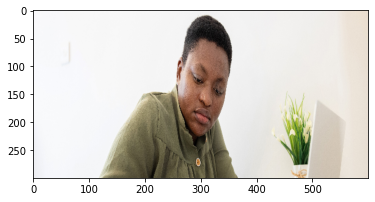

In [23]:
img = cv2.imread('img.png')
img = cv2.resize(img, (600, 300))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

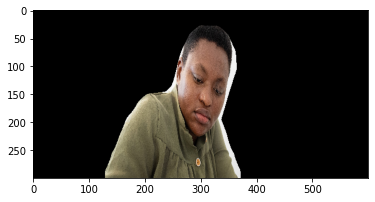

In [24]:
result = bodypix_model.predict_single(img)
mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
masked_image = cv2.bitwise_and(img, img, mask= mask)
plt.imshow(masked_image)

In [25]:
masked_image.shape

(300, 600, 3)

# add virtual background

In [27]:
background = cv2.imread('beach.jpg')
background = background[:300, :600, :]
background.shape

(300, 600, 3)

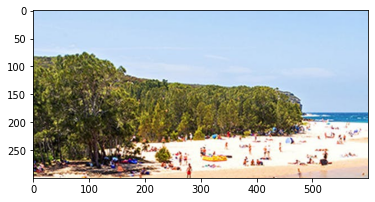

In [28]:
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

In [32]:
result = bodypix_model.predict_single(img)
mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
masked_image = cv2.bitwise_and(img, img, mask= mask)

# apply virtual background
neg = np.add(mask, -1)
inverse = np.where(neg==-1, 1, neg).astype(np.uint8)
masked_background = cv2.bitwise_and(background, background, mask=inverse)
final = cv2.add(masked_image, masked_background)

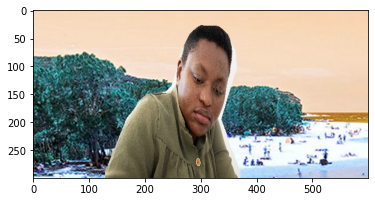

In [33]:
plt.imshow(final)

# Detect the head co-ordinate and add cap

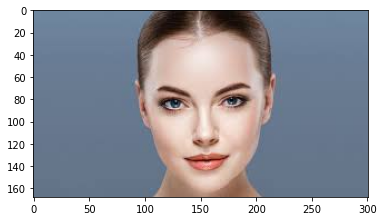

In [72]:
img = cv2.imread("/content/face.jpg")
plt.imshow(img[:, :, ::-1])

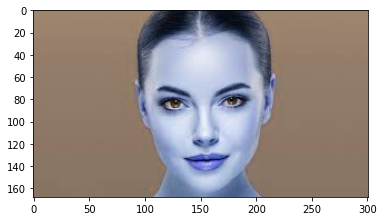

In [73]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [74]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_classifier

< cv2.CascadeClassifier 0x7febf0d79a10>

In [75]:
faces = face_classifier.detectMultiScale(gray,1.2,4)
faces

array([[ 90,  33, 127, 127]], dtype=int32)

In [62]:
for (x,y,w,h) in faces:
    cv2.rectangle(final, (x,y), (x+w,y+h), (127,0,255),2)

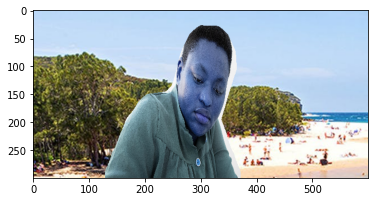

In [63]:
plt.imshow(final[:,:,::-1])